<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df=pd.read_csv('/content/stock_data.csv', index_col='Date', parse_dates=True)

In [6]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]["Close"]

Date
1984-09-07      0.42388
1984-09-10      0.42134
1984-09-11      0.42902
1984-09-12      0.41618
1984-09-13      0.43927
                ...    
2017-11-06    173.63000
2017-11-07    174.18000
2017-11-08    175.61000
2017-11-09    175.25000
2017-11-10    174.67000
Name: Close, Length: 8364, dtype: float64
Date
2010-06-28     17.00
2010-06-29     23.89
2010-06-30     23.83
2010-07-01     21.96
2010-07-02     19.20
               ...  
2017-11-06    302.78
2017-11-07    306.05
2017-11-08    304.31
2017-11-09    302.99
2017-11-10    302.99
Name: Close, Length: 1858, dtype: float64
Date
1986-03-13     0.07533
1986-03-14     0.07533
1986-03-17     0.07533
1986-03-18     0.07533
1986-03-19     0.07533
                ...   
2017-11-06    84.47000
2017-11-07    84.26000
2017-11-08    84.56000
2017-11-09    84.09000
2017-11-10    83.87000
Name: Close, Length: 7983, dtype: float64
Date
2012-05-18     38.23
2012-05-21     34.03
2012-05-22     31.00
2012-05-23     32.00
2012-05-24     33.03
 

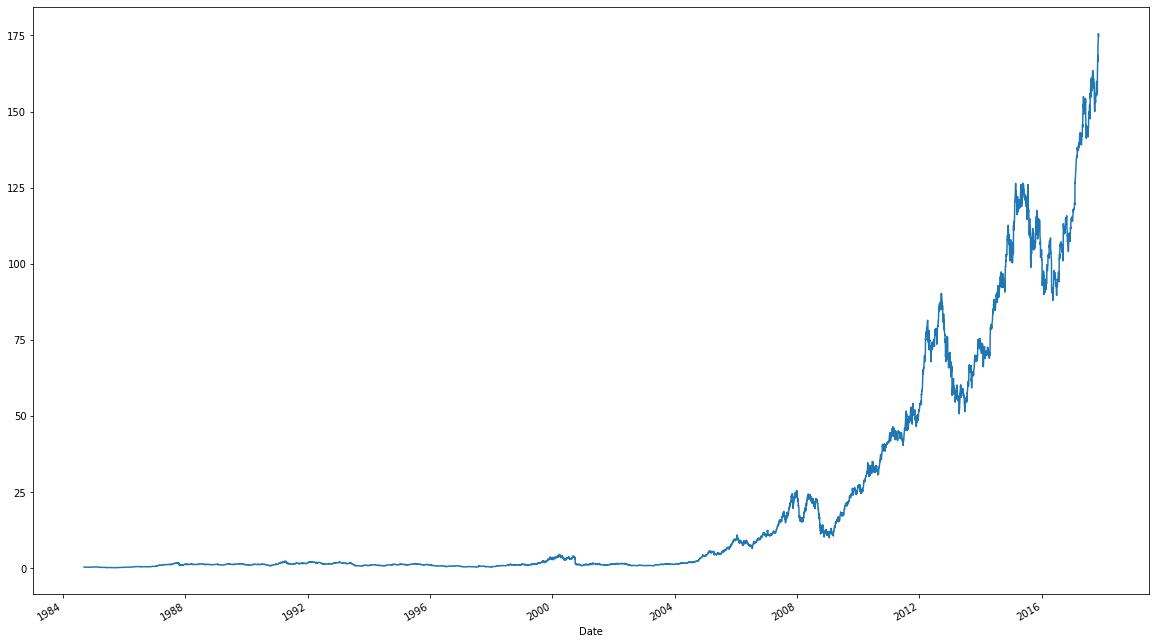

In [33]:
stock['AAPL'].plot(figsize=(20, 12))

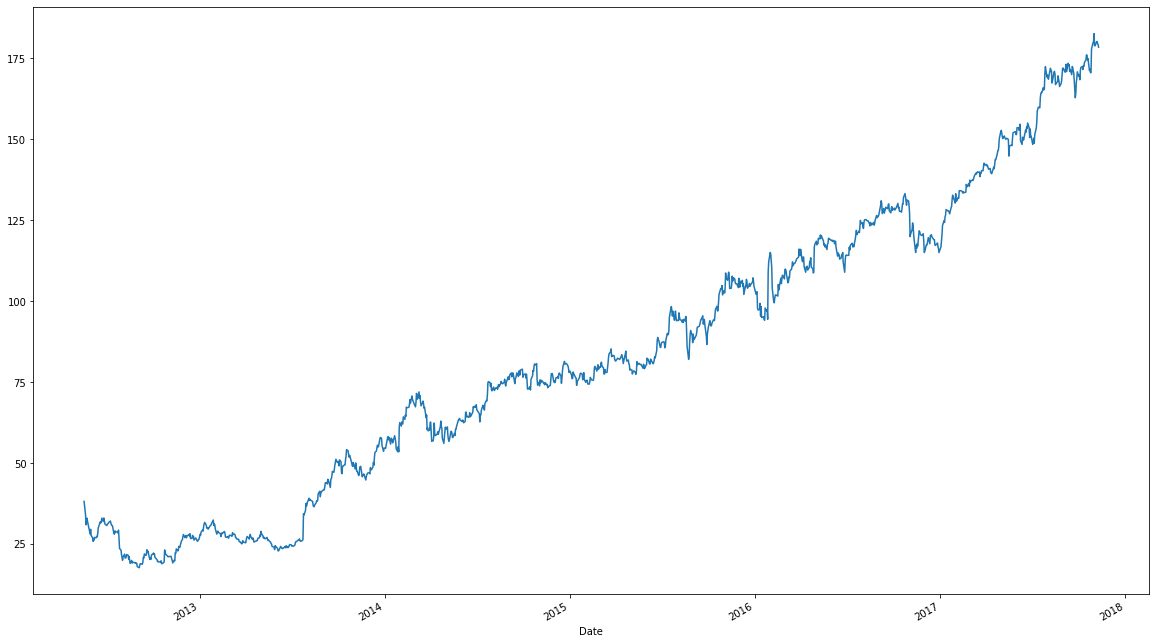

In [34]:
stock['FB'].plot(figsize=(20, 12))

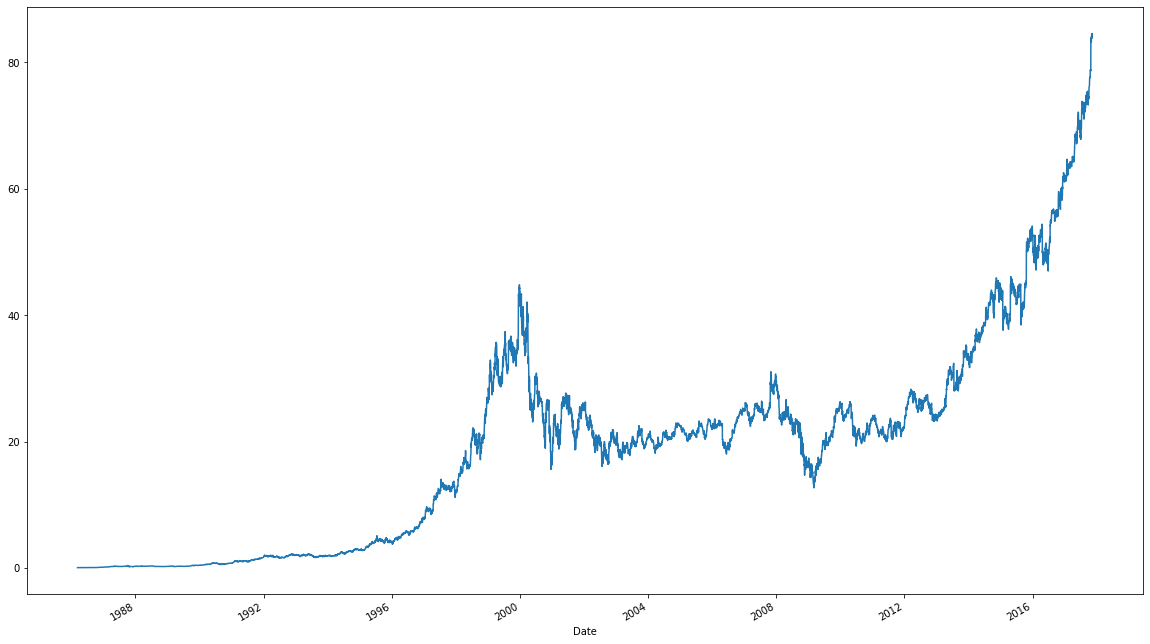

In [35]:
stock['MSFT'].plot(figsize=(20, 12))

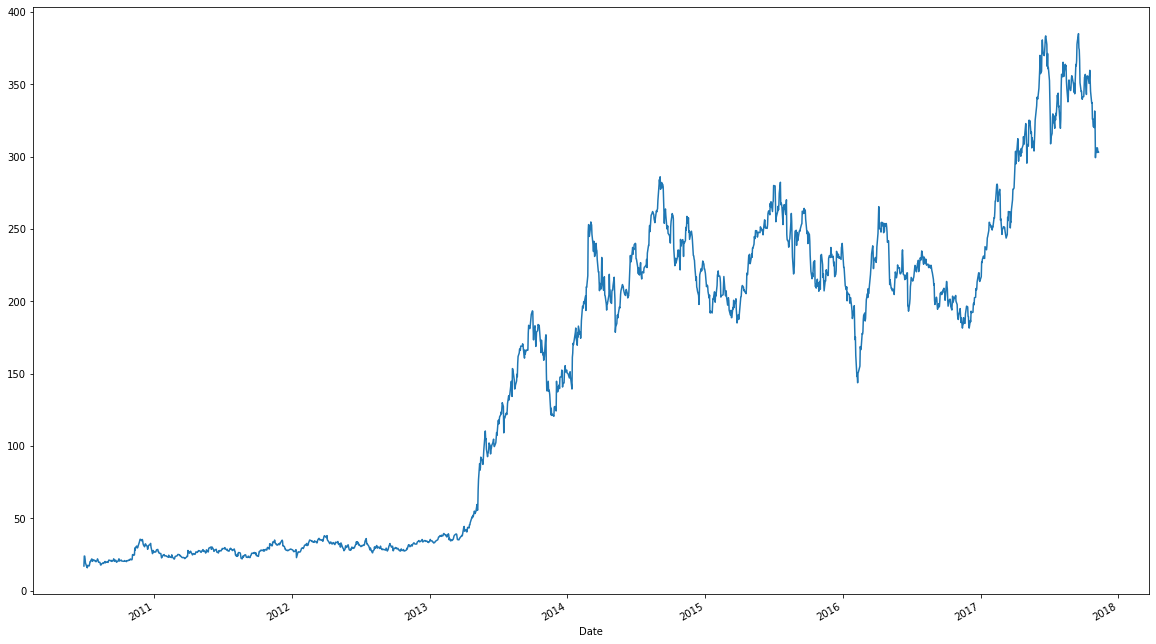

In [36]:
stock['TSLA'].plot(figsize=(20, 12))

In [11]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(stock['AAPL'])

1. ADF :  4.373924240116305
2. P-Value :  1.0
3. Num Of Lags :  37
4. Num Of Observations Used For ADF Regression: 8326
5. Critical Values :
	 1% :  -3.431135649440309
	 5% :  -2.861887202630927
	 10% :  -2.566954811119012


In [46]:
#define p d q
def Auto_Arima(data):
  stepwise_fit = auto_arima(data, trace=True,suppress_warnings=True)
  return stepwise_fit

In [47]:
print(Auto_Arima(stock['AAPL']))

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=3.48 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=22150.417, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=20021.975, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.46 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=19137.848, Time=0.49 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=18444.386, Time=0.67 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=18069.705, Time=0.92 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=17853.071, Time=1.07 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.38 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=4.48 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=17855.071, Time=2.59 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 20.934 seconds
 ARIMA(5,2,0)(0,0,0)[0]          


In [42]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [51]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [54]:
def Model(data,p,d,q):
  model=ARIMA(data,order=(p,d,q))
  model=model.fit()
  return model

In [95]:
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse

In [96]:
print(RMSE(FB_Model,FB_train,FB_test))

1.6724341727637464


In [55]:
AAPL_Model=Model(stock['AAPL'],5,2,0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [45]:
AAPL_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 8362
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8920.535
Method:                       css-mle   S.D. of innovations              0.703
Date:                Mon, 31 May 2021   AIC                          17855.071
Time:                        08:56:56   BIC                          17904.291
Sample:                             2   HQIC                         17871.881
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.649e-05      0.002      0.026      0.979      -0.004       0.004
ar.L1.D2.Close    -0.8077      0.011    -74.789      0.000      -0.829      -0.786
ar.L2.D2.Close    -0.6675      0.013    -49.534      0.000      -0.694      -0.641
ar.L3.D2.Close    -0.5290      0.014    -37.277      0.000      -0.557      -0.501
ar.L4.D2.Close    -0.3347      0.013    -24.831      0.000      -0.361      -0.308
ar.L5.D2.Close    -0.1610      0.011    -14.884      0.000      -0.182      -0.140
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5223           -1.2418j            1.3472           -0.1866
AR.2            0.5223           +1.2418j            1.3472            0.1866
AR.3           -1.4880           -0.0000j            1.4880           -0.5000
AR.4           -0.8180           -1.2772j            1.5167           -0.3407
AR.5           -0.8180           +1.2772j            1.5167            0.3407
-----------------------------------------------------------------------------
"""

In [81]:
#visualize predict vs actual data
def Plot_Pred(data,model,train,test):
  start=len(train)
  end=len(train)+len(test)-1
  pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
  pred.plot(legend=True,figsize=(20,12))
  data.plot(legend=True)

In [52]:
print(Auto_Arima(stock['FB']))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4992.984, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4995.299, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4996.790, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4996.773, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4999.822, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4992.263, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4998.416, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4998.733, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4990.713, Time=1.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4992.206, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4992.710, Time=2.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4982.592, Time=1.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4989.862, Time=0.40 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4984.229, Time=2.97 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept

In [72]:
FB_Model=Model(stock['FB'],1,1,4)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

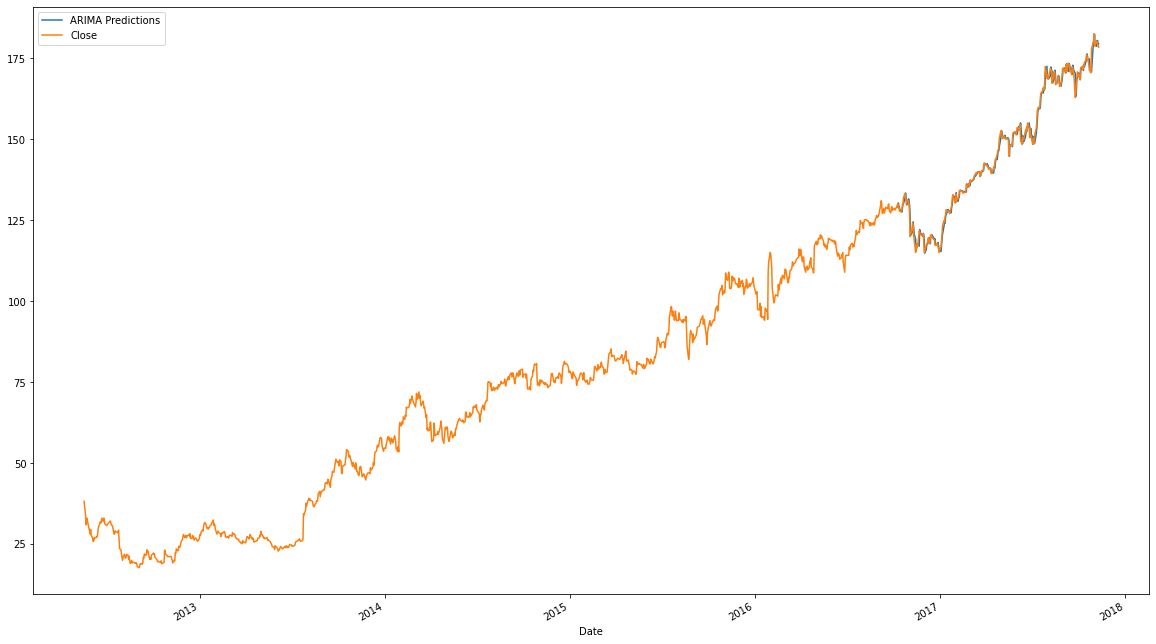

In [82]:
Plot_Pred(stock['FB'],FB_Model,FB_train,FB_test)

In [63]:
print(Auto_Arima(stock['TSLA']))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11086.990, Time=3.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11090.531, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11089.629, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11089.687, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11090.452, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11092.837, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11093.049, Time=1.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11092.865, Time=1.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11092.838, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11091.596, Time=0.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11091.425, Time=1.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11091.394, Time=0.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11094.896, Time=3.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11086.833, Time=1.51 sec
 ARIMA(1,1,2)(0,0,0

In [74]:
TSLA_Model=Model(stock['TSLA'],2,1,2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

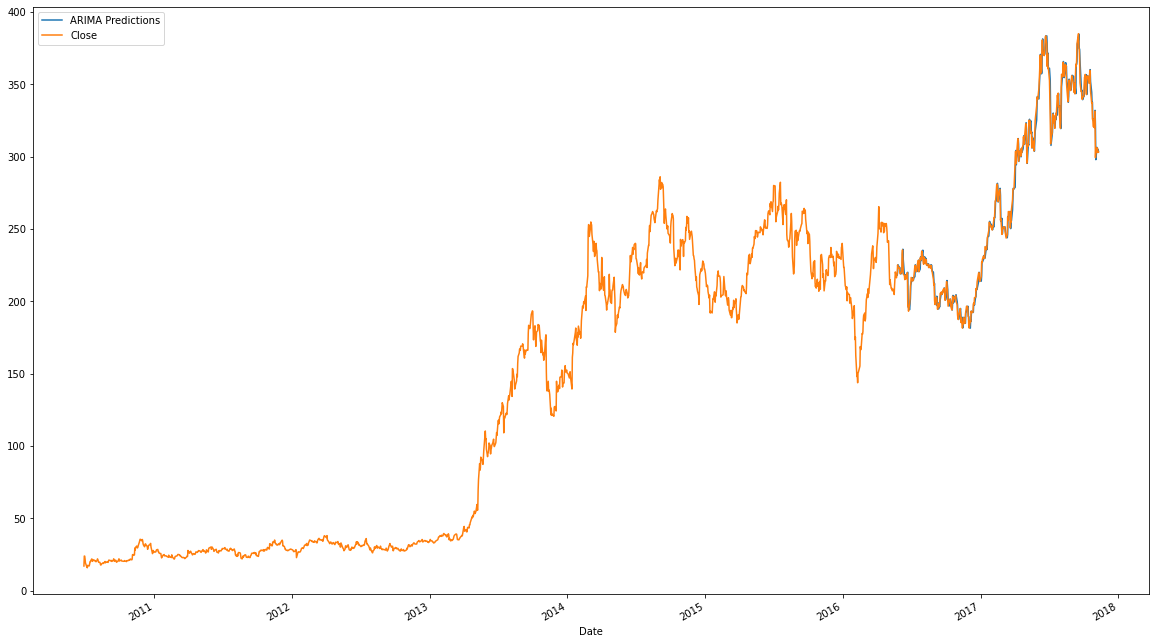

In [84]:
Plot_Pred(stock['TSLA'],TSLA_Model,TSLA_train,TSLA_test)